# Homework 2
### 11.12.2020
### Akarun Ayça Ersoy

**Task: Dimensionality reduction for time series data**  
We initially have accelerometer readings in three directions collected from 8 users for the characterization of 8 gesture patterns. The aim is to reduce this 3-dimensional data into an 1-dimensional one.  
In the training dataset, there are 896 instances with datapoints at 315 time points. Each has the class information attached to it. Initially, the X, Y, Z information are stored in different files. 

In [2]:
#Setting the working directory and reading the raw data
setwd('/Users/user/Documents/AYCADoc/BOUN/IE582')
library(data.table)
library(scatterplot3d)
library(ggplot2)

dataX <- fread('uWaveGestureLibrary_X_TRAIN')
dataY <- fread('uWaveGestureLibrary_Y_TRAIN')
dataZ <- fread('uWaveGestureLibrary_Z_TRAIN')

## Task A 
The aim of the first task is to convert the accelaration information into position information and to visualize the gestures in 3D to see how they relate to their symbolic counterparts.  
Since each instance has class information attached to it, the position information is filtered and plotted for each of the 8 classes separately.

In [3]:
#The first column contains the class information:
#Calculating the velocity vector by taking the cumulative sum of the acceleration data
Xvel <- t(apply(dataX[,-1],1,cumsum))
Yvel <- t(apply(dataY[,-1],1,cumsum))
Zvel <- t(apply(dataZ[,-1],1,cumsum))

#Calculating positions by taking the cumulative sum of the velocity data
Xpos <- t(apply(Xvel,1,cumsum))
Ypos <- t(apply(Yvel,1,cumsum))
Zpos <- t(apply(Zvel,1,cumsum))

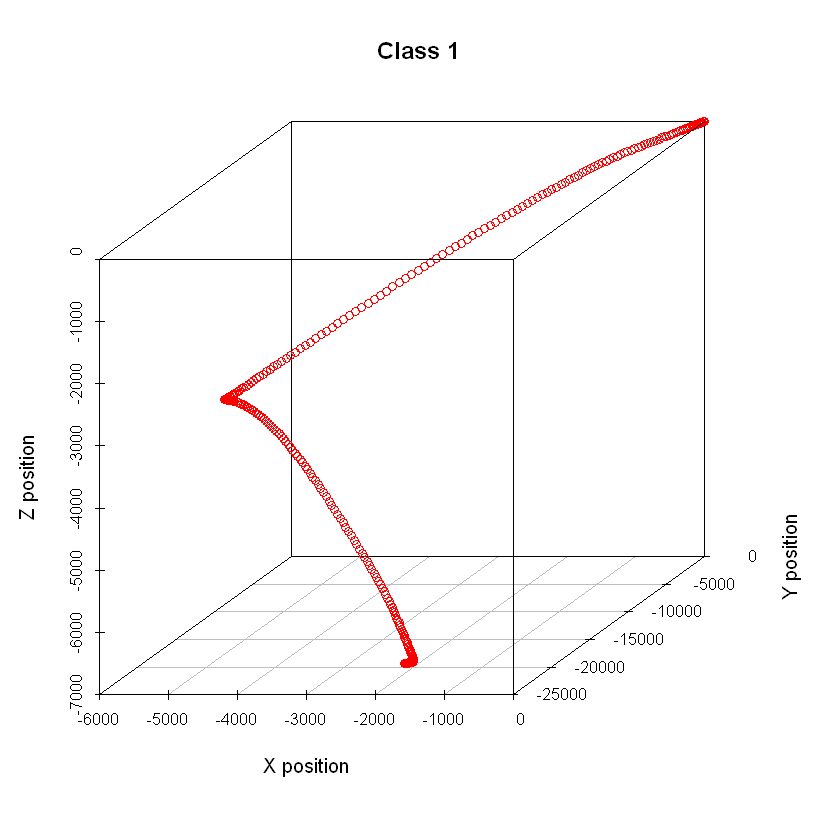

In [4]:
#The indexes of time series belonging to class 1 are stored
class1 <- which(dataX[,1]==1)
classLen <- c(length(class1))
#The first example of Class 1 is plotted in all directions
scatterplot3d(x=Xpos[class1[1],], y=Ypos[class1[1],], z=Zpos[class1[1],],
              color="red", main='Class 1',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey")

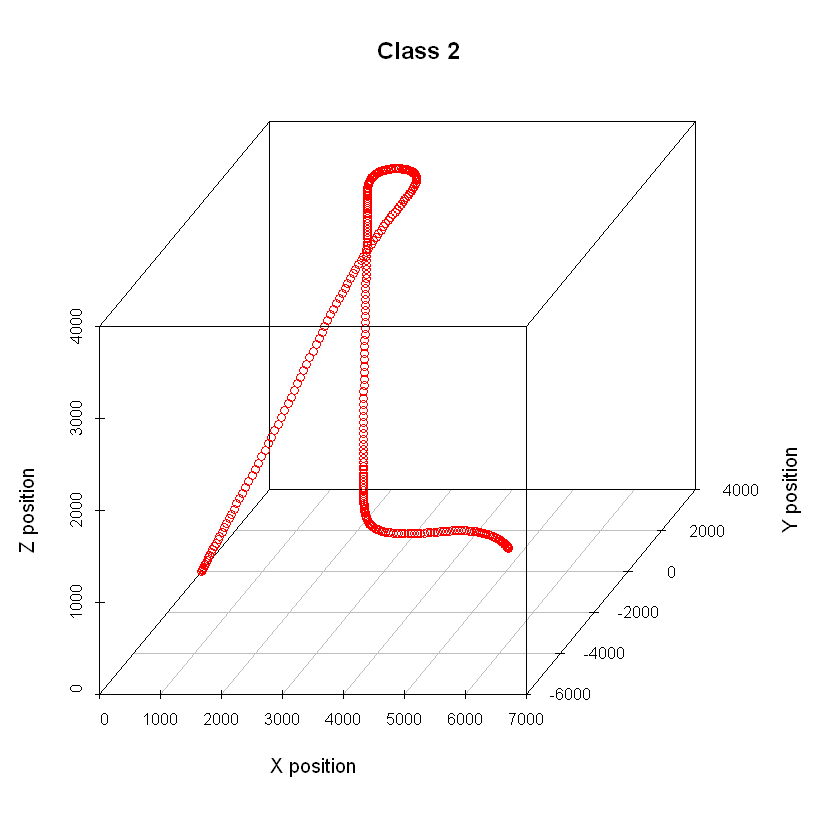

In [5]:
#Class 2
class2 <- which(dataX[,1]==2)
classLen <- append(classLen,length(class2))
scatterplot3d(x=Xpos[class2[1],], y=Ypos[class2[1],], z=Zpos[class2[1],],
              color="red", main='Class 2',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

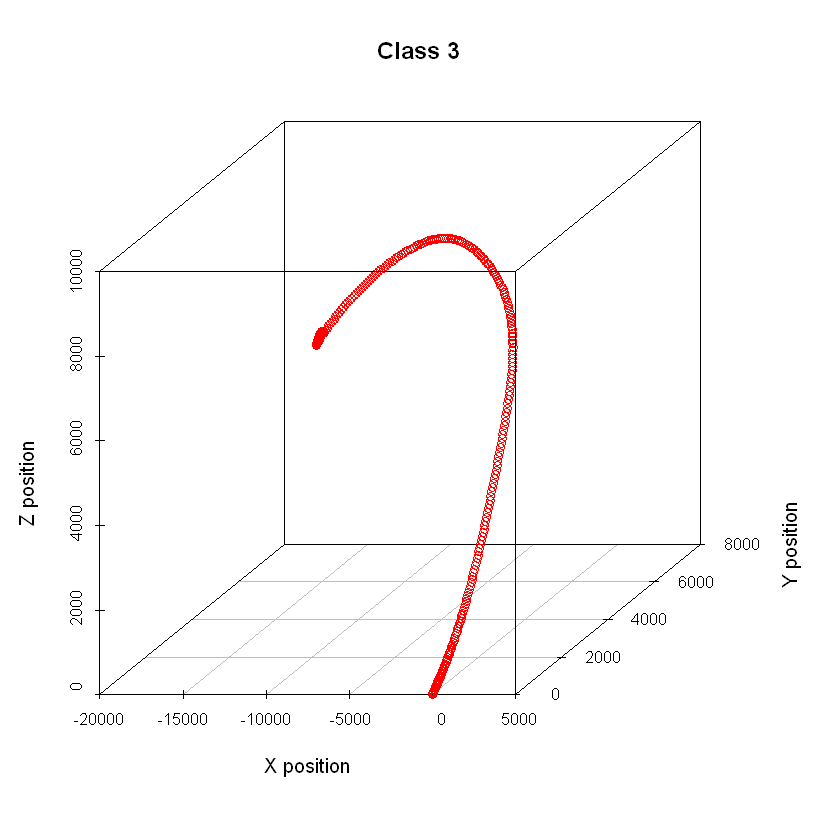

In [6]:
#Class 3
class3 <- which(dataX[,1]==3)
classLen <- append(classLen,length(class3))
scatterplot3d(x=Xpos[class3[1],], y=Ypos[class3[1],], z=Zpos[class3[1],],
              color="red", main='Class 3',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

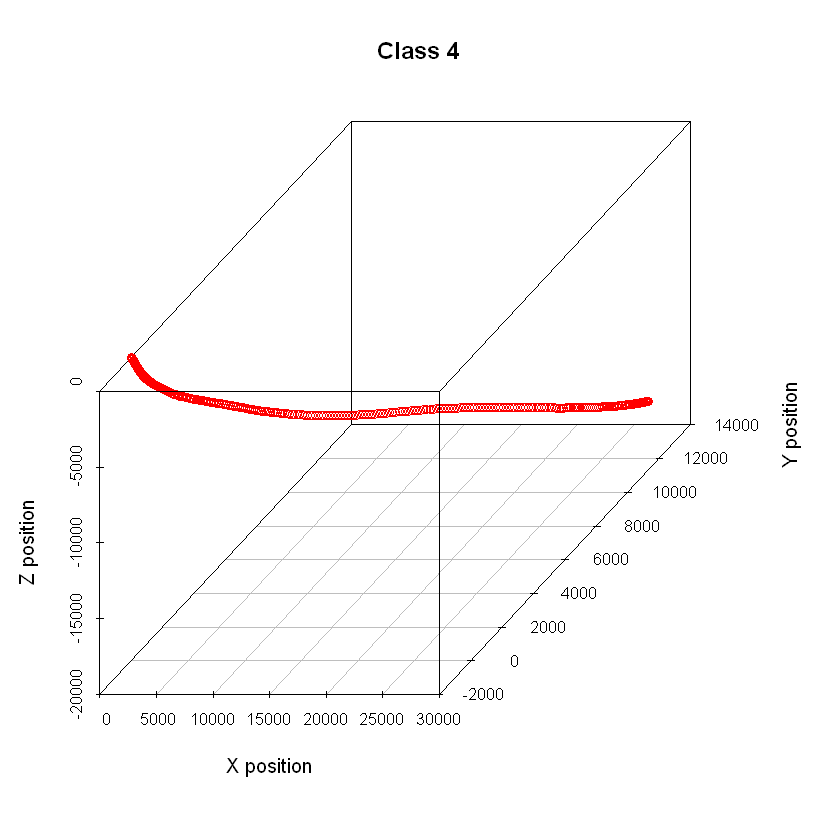

In [7]:
#Class 4
class4 <- which(dataX[,1]==4)
classLen <- append(classLen,length(class4))
scatterplot3d(x=Xpos[class4[1],], y=Ypos[class4[1],], z=Zpos[class4[1],],
              color="red", main='Class 4',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

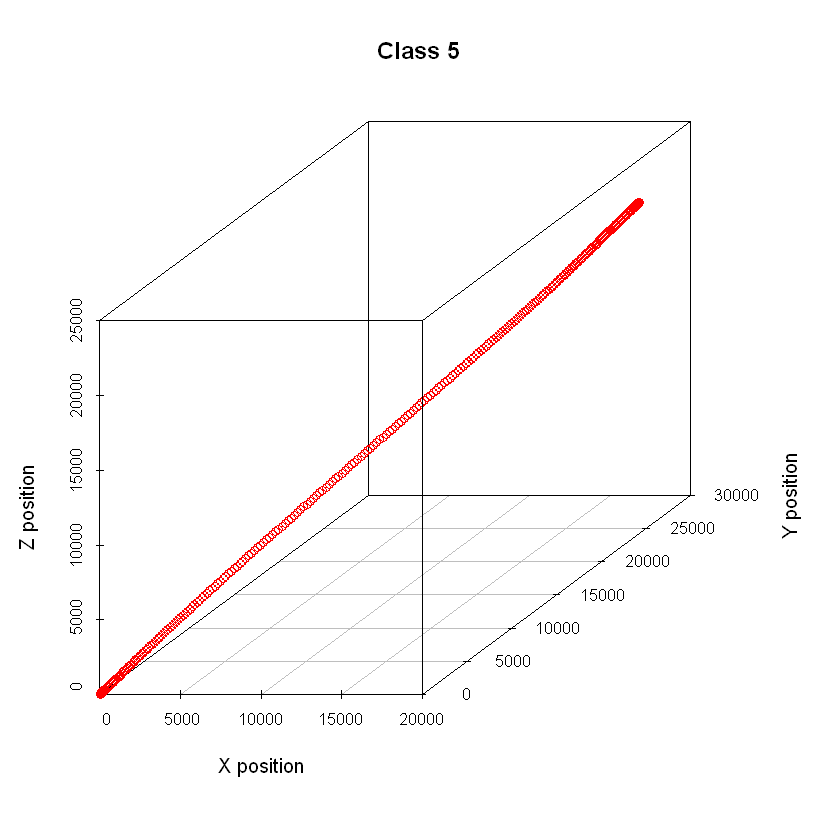

In [8]:
#Class 5
class5 <- which(dataX[,1]==5)
classLen <- append(classLen,length(class5))
scatterplot3d(x=Xpos[class5[1],], y=Ypos[class5[1],], z=Zpos[class5[1],],
              color="red", main='Class 5',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

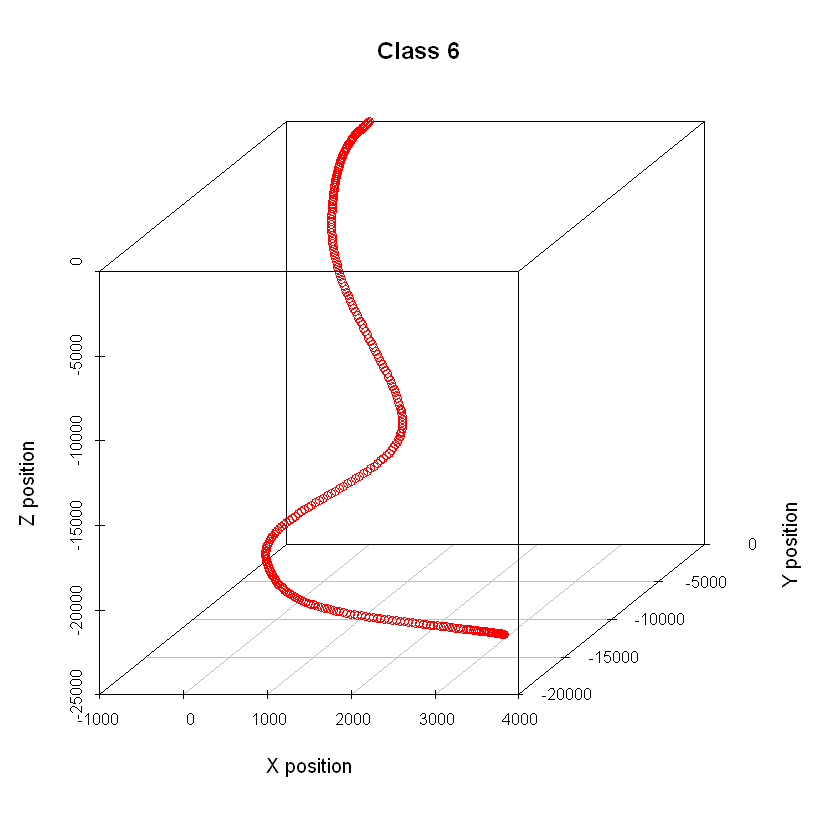

In [9]:
#Class 6
class6 <- which(dataX[,1]==6)
classLen <- append(classLen,length(class6))
scatterplot3d(x=Xpos[class6[1],], y=Ypos[class6[1],], z=Zpos[class6[1],],
              color="red", main='Class 6',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

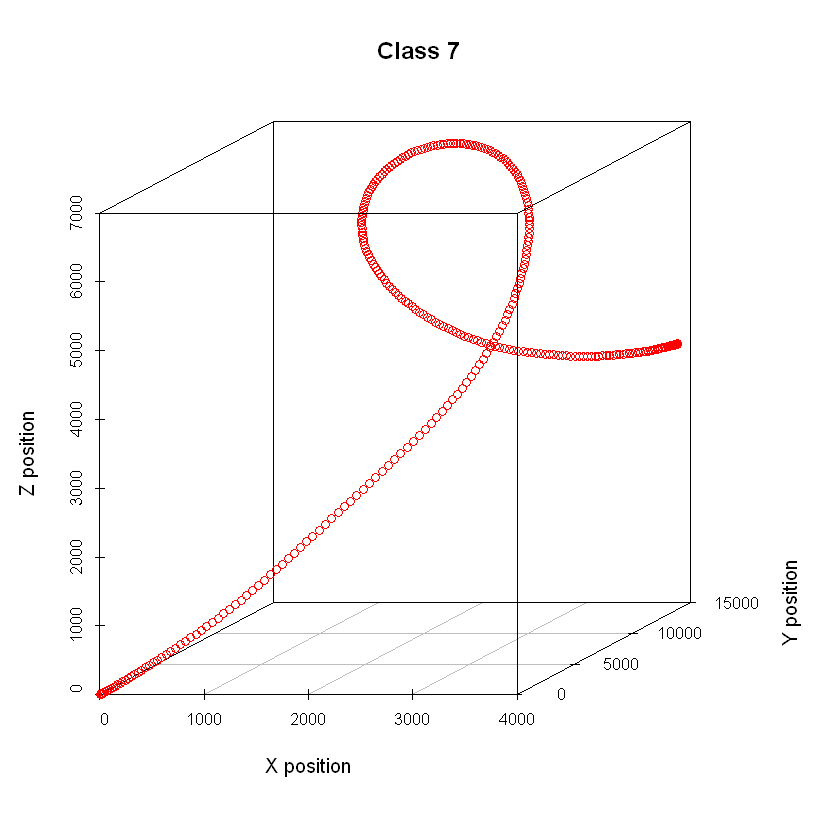

In [10]:
#Class 7
class7 <- which(dataX[,1]==7)
classLen <- append(classLen,length(class7))
scatterplot3d(x=Xpos[class7[1],], y=Ypos[class7[1],], z=Zpos[class7[1],],
              color="red", main='Class 7',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

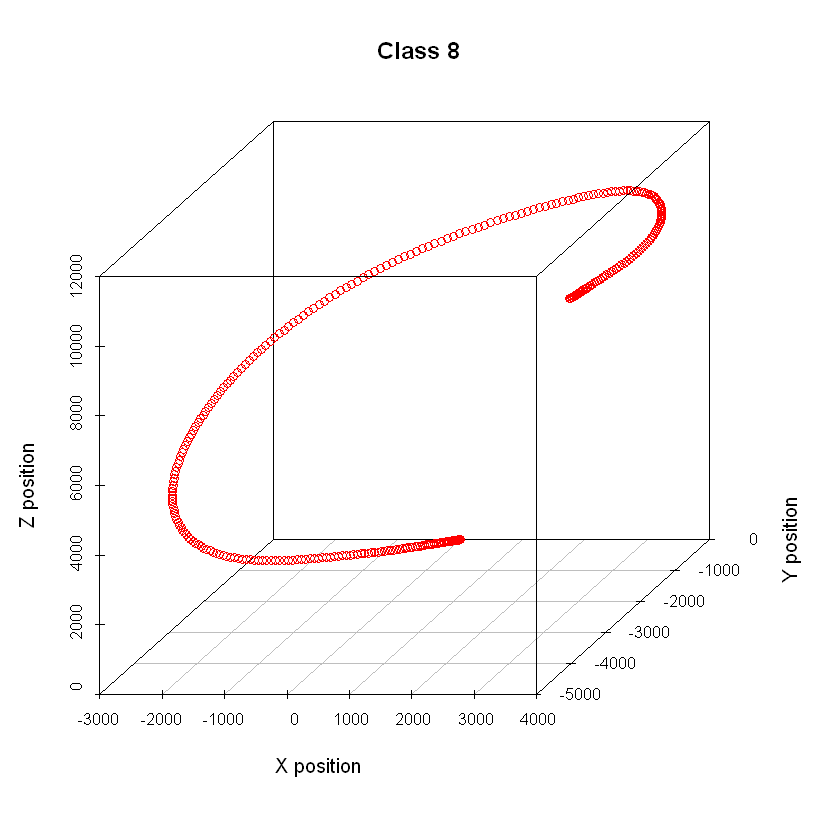

In [11]:
#Class 8
class8 <- which(dataX[,1]==8)
classLen <- append(classLen,length(class8))
scatterplot3d(x=Xpos[class8[1],], y=Ypos[class8[1],], z=Zpos[class8[1],],
              color="red", main='Class 8',
              xlab="X position", ylab="Y position",
              zlab="Z position", col.grid="grey", grid=T)

### Comments
The 3D plot for Class 1 greatly resembles the first gesture. It has a distinctive 'corner' where the direction changes abruptly. The 3D plot for Class 2 also resembles the illustration, there are mulptiple corners. It would probably more closely resemble the sketch if it were viewed from a different angle. Class 3 is probably thte least similar to its illustration. I wouldn't be able to match such a feature to Class 3.   
Class 4, 5 and 6 all slightly resemble their illustration counterparts. However, 3D plot for class 4 more resembles a rightward movement. Class 7 and 8 also have a distinctive circular shape that is recognizable. However, they are identical besides the direction in the sketch, whereas in the 3D plots they have distinctive shapes.  
Overall, it's would likely be possible to categorize a new instance based on its 3D shape into the correct class since they all have distinctive shapes. 

## Task B
In this section, the data is initially converted into a "long format". Then principal component analysis (PCA) is performed on it. Using the first principle component the 3D data is reduced to 1D.

In [12]:
#creating a long format data frame
#colNum=315, rowNum=896
colNum <- ncol(Xvel)
rowNum <- nrow(Xvel)

timeID <- rep(1:rowNum,each=colNum)
timeINDEX <- rep(1:rowNum, times=colNum)
longData <- data.frame("timeID"=timeID,"timeINDEX"=timeINDEX)

#The x, y, z components are ordered based on their class information.
Xpos <- cbind(dataX[,1],Xpos)
XposOrdered <- data.table(Xpos, key="V1")
Ypos <- cbind(dataY[,1],Ypos)
YposOrdered <- data.table(Ypos, key="V1")
Zpos <- cbind(dataZ[,1],Zpos)
ZposOrdered <- data.table(Zpos, key="V1")
longData <- cbind(longData,
                  "X"=as.vector(t(as.matrix(XposOrdered[,-1]))),
                  "Y"=as.vector(t(as.matrix(YposOrdered[,-1]))),
                  "Z"=as.vector(t(as.matrix(ZposOrdered[,-1]))))
classLen <- classLen*colNum
classInfo <- rep(1:8,times=classLen)
longData <- cbind(longData, "class"=classInfo)

In [13]:
head(longData)

timeID,timeINDEX,X,Y,Z,class
1,1,-0.7914472,-1.959984,-0.2490781,1
1,2,-2.3743415,-5.879951,-0.7472342,1
1,3,-4.7531086,-11.756519,-1.4968294,1
1,4,-7.9419407,-19.578838,-2.5054346,1
1,5,-11.9800028,-29.316966,-3.7939431,1
1,6,-16.9215298,-40.929440,-5.3912875,1


In [14]:
#Using the 'princomp' function PCA is performed on the whole dataset
pca <- princomp(longData[,3:5],cor=T)
print(summary(pca, loadings = T))
weights1 <- pca$loadings[,1]

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2724995 1.0380930 0.5505524
Proportion of Variance 0.5397517 0.3592124 0.1010360
Cumulative Proportion  0.5397517 0.8989640 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.209  0.908  0.362
Y  0.723  0.105 -0.683
Z  0.658 -0.404  0.635


**Comments**  
The first component covers 54% of the variance, the second covers 36% and the third one covers 10%. Our aim was to reduce the dimensions of the dataset therefore just using the loadings (eigenvectors) of the first component should be enough. While some of the variance is lost, 54% is maintained. 

In [15]:
#Using the weights (eigenvectors) to calculate the reduced univariate data
#and scaling the reduced data
reducedData <- (as.matrix(longData[,3:5])%*%as.vector(weights1))
reducedData <- cbind(longData$timeID,longData$timeINDEX,reducedData,longData$class)
reducedData[,3] <- scale(reducedData[,3])
head(reducedData)

1,1,0.02119362,1
1,2,0.02092430,1
1,3,0.02052031,1
1,4,0.01998164,1
1,5,0.01930828,1
1,6,0.01850018,1


In [16]:
#Manually choosing examples from each class (1 to 8)
examples <- c(25,50,125,180,259,299,370,400,
              480,535,595,653,710,774,828,861)
ind <- matrix(0,16,315)
for(i in 1:16){
    ind[i,] <- which(reducedData[,1]==examples[i],arr.ind=T)
}

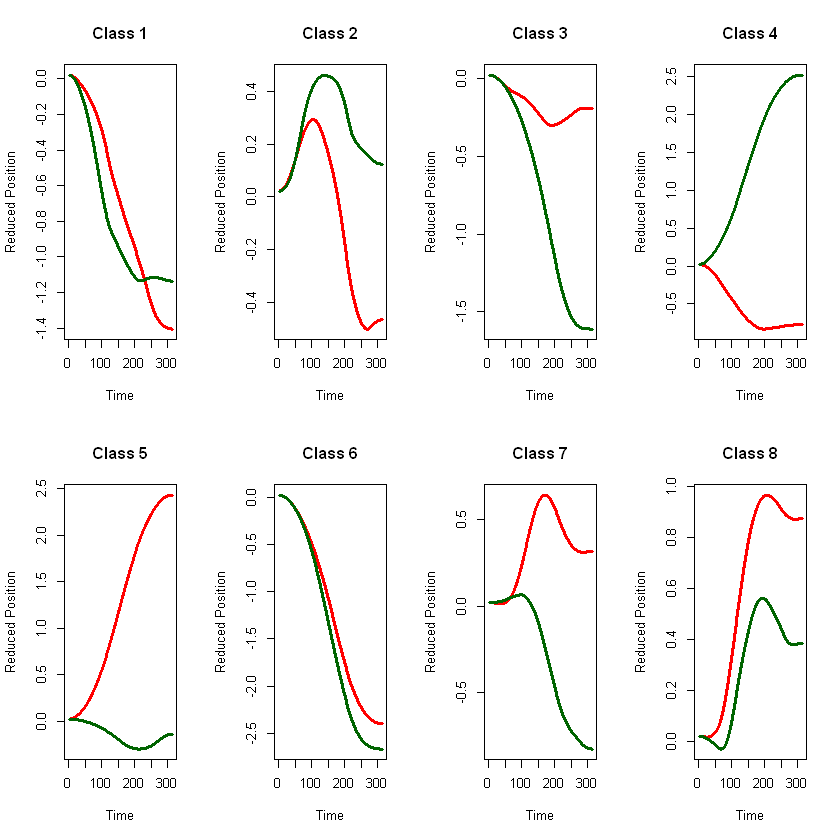

In [17]:
#time series index
tim <- c(1:315)
#The 2 examples from each class are plotted on the same plot
#The limits of the plots were selected by taking the min/max of the 2 examples
par(mfrow = c(2,4))
for(i in 1:8){
    k<-i*2-1
    limMin <- min(min(reducedData[ind[k,],3]),min(reducedData[ind[k+1,],3]))
    limMax <- max(max(reducedData[ind[k,],3]),max(reducedData[ind[k+1,],3]))
    plot(tim, reducedData[ind[k,],3], type="l", col="red",
         xlab='Time', ylab='Reduced Position', main=paste('Class', i),ylim=c(limMin,limMax), lwd=3)
    lines( tim, reducedData[ind[k+1,],3], type="l", col="darkgreen", lwd=3)
}

### Comments
Each of these plots contains 2 examples for each class. It was hypothesized that they would have show similar trends or at least they would have a distinctive shape. It appears that classes 2 and 8 have a distinctive shape. Whereas classes 4 and 5 are inseparable from each other. Similarly, the examples for classes 1 and 6 are similar to each other. We might only be able to differentiate class 1 from the slight irregularity compared to class 6. These similarities are because only the first eigenvector was used in the reduction of the series and it maintains only 54% of the variance. Therefore 46% of the variance was lost during this operation. However, even this was enough make a very rough classification system. 

## Task C
In this section, PCA is performed for each class separately. The results are compared to each other and the previous section where PCA was performed for the complete dataset.

In [18]:
#PCA only for Class 1
classEnd <- cumsum(classLen)
pca1 <- princomp(longData[1:classEnd[1],3:5],cor = T)
print(summary(pca1,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2932492 1.0091473 0.5559931
Proportion of Variance 0.5574978 0.3394594 0.1030428
Cumulative Proportion  0.5574978 0.8969572 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.119  0.973  0.198
Y  0.693 -0.224  0.685
Z  0.711        -0.701


In [19]:
#PCA only for Class 2
pca2 <- princomp(longData[(classEnd[1]+1):classEnd[2],3:5],cor = T)
print(summary(pca2,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.1286537 0.9457021 0.9120243
Proportion of Variance 0.4246197 0.2981175 0.2772628
Cumulative Proportion  0.4246197 0.7227372 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.535  0.814  0.224
Y  0.613 -0.192 -0.767
Z  0.581 -0.548  0.602


In [20]:
#PCA only for Class 3
pca3 <- princomp(longData[(classEnd[2]+1):classEnd[3],3:5],cor = T)
print(summary(pca3,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2156489 1.0027730 0.7187794
Proportion of Variance 0.4926008 0.3351846 0.1722146
Cumulative Proportion  0.4926008 0.8277854 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.709         0.705
Y  0.371  0.847 -0.380
Z -0.599  0.532  0.599


In [21]:
#PCA only for Class 4
pca4 <- princomp(longData[(classEnd[3]+1):classEnd[4],3:5],cor = T)
print(summary(pca4,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2855781 0.9914895 0.6035210
Proportion of Variance 0.5509037 0.3276838 0.1214125
Cumulative Proportion  0.5509037 0.8785875 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.702         0.711
Y  0.674  0.285 -0.681
Z -0.230  0.958  0.173


In [22]:
#PCA only for Class 5
pca5 <- princomp(longData[(classEnd[4]+1):classEnd[5],3:5],cor = T)
print(summary(pca5,loadings = T))

Importance of components:
                          Comp.1    Comp.2     Comp.3
Standard deviation     1.4038307 0.9685920 0.30180949
Proportion of Variance 0.6569135 0.3127235 0.03036299
Cumulative Proportion  0.6569135 0.9696370 1.00000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.245  0.970       
Y  0.685 -0.177  0.707
Z  0.686 -0.170 -0.708


In [23]:
#PCA only for Class 6
pca6 <- princomp(longData[(classEnd[5]+1):classEnd[6],3:5],cor = T)
print(summary(pca6,loadings = T))

Importance of components:
                          Comp.1    Comp.2     Comp.3
Standard deviation     1.3400570 0.9638120 0.52470332
Proportion of Variance 0.5985843 0.3096445 0.09177119
Cumulative Proportion  0.5985843 0.9082288 1.00000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.291  0.955       
Y -0.671  0.251 -0.698
Z -0.682  0.162  0.713


In [24]:
#PCA only for Class 7
pca7 <- princomp(longData[(classEnd[6]+1):classEnd[7],3:5],cor = T)
print(summary(pca7,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2971922 0.8883869 0.7266781
Proportion of Variance 0.5609026 0.2630771 0.1760203
Cumulative Proportion  0.5609026 0.8239797 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.596  0.487  0.639
Y  0.632  0.207 -0.747
Z  0.496 -0.849  0.184


In [25]:
#PCA only for Class 8
pca8 <- princomp(longData[(classEnd[7]+1):classEnd[8],3:5],cor = T)
print(summary(pca8,loadings = T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2203138 0.9683089 0.7571078
Proportion of Variance 0.4963886 0.3125407 0.1910707
Cumulative Proportion  0.4963886 0.8089293 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.664  0.253  0.704
Y  0.337 -0.941       
Z  0.668  0.223 -0.710


### Comments
For the PCA performed on the complete dataset, the components covered 54%, 36% and 10% of the variance. In this section PCA is performed separately for each class. The standard deviation, proportion of variance and the loadings are reported. The first component of class 5 covers the most variance (66%) out of all of the first components and the comp.1 of class 2 covers the least (42%). The loadings of comp.1 of class 5 are most similar to the ones given in part B - which were used to calculate the univariate results. It's also noteworthy that the 3rd component of class 5 doesn't really affect the results. Almost all of the variance is covered by the first two components. This might be because of the relatively linear motion described by class 5 (as seen in the figure from task A). Similarly, the motion described by class 2 is probably the most complex and PCA is unable to capture the variance in a single component.   
Overall all of the results given by the classes are quite similar, with very similar standard deviations for each of the components. It was possible to guess which class would be better represented by a single component by looking at the complexity of the motion. 

## Task D
In this section the distance between time series are calculated and a symmetric distance matrix is obtained. Multidimensional scaling is applied to this distance matrix to obtain results in 2D. The data points are colored based on class and plotted. For this to be a viable classification method, we would need to obtain distinct clusters for the different classes.

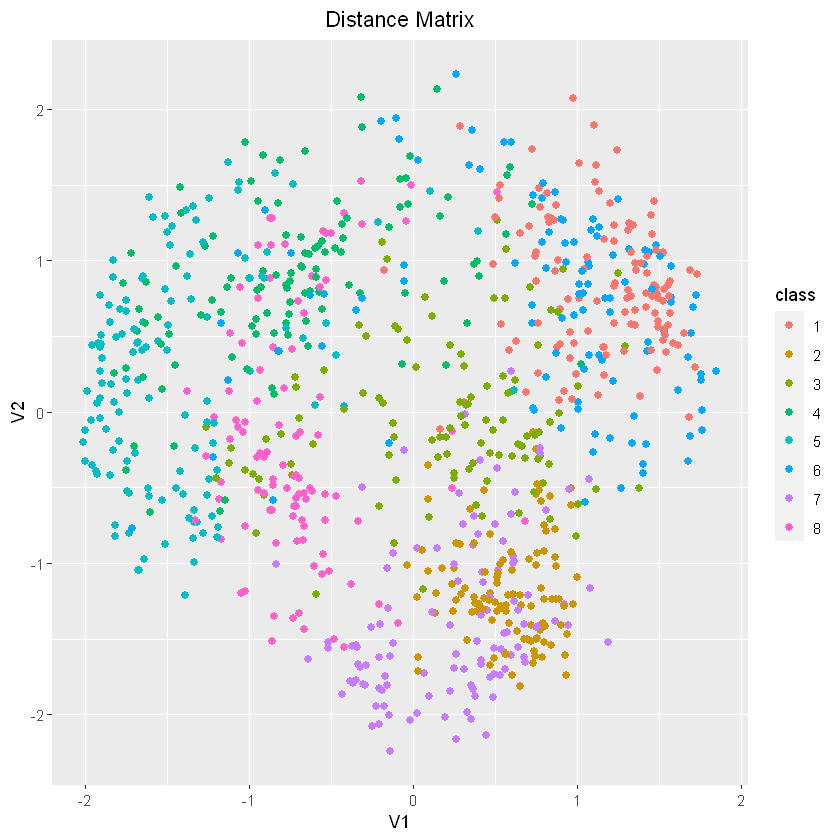

In [26]:
#Combining the initial data to create a 'wide format' dataframe
wideData <- cbind(dataX, dataY[,2:316], dataZ[,2:316])
colnames(wideData)[1] <- "class"
#Distances between the rows are calculated using the dist function
#Result is a 896x896 matrix
distance <- as.matrix(dist(wideData[,-1],method = "euclidean"))
#Multidimensional scaling is used to reduce the dimensions to 2
scaledDist <- cmdscale(distance, k=2)
scaledDist <- as.data.frame(scaledDist)
scaledDist$class <- wideData$class
scaledDist[,1:2]<-scale(scaledDist[,1:2])

#Each data point is colored according to its class
ggplot(scaledDist, aes(x=V1,y=V2,color=class))+geom_point(aes(colour=factor(class)), size=2)+ggtitle("Distance Matrix")+theme(plot.title = element_text(hjust = 0.5))

### Comments
If the colored clusters were more clearly separated, this would be a feasible classification method. There appears to be a distinction between the classes but it's not clear-cut. If we had a time series that we didn't know the class of we could attempt to predict its class based on its distance to each of the centroids of the clusters. However, as it can be seen from the plot some of the classes are hard to separate. For example, 2 and 6 are almost fully overlapping. 